In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.drop(columns = ['quality','fixed acidity','volatile acidity'],inplace = True)

In [5]:
df = df.drop_duplicates()

### chuẩn hóa StandarScaler

In [6]:
X = df.values

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
X[0:5]

array([[-1.39558537, -0.46100534, -0.24509861, -0.46935239, -0.38516424,
         0.58752344,  1.30730671, -0.57875494, -0.95266511],
       [-1.39558537,  0.05672569,  0.20068737,  0.87032372,  0.60244883,
         0.04943581, -0.71268759,  0.12414851, -0.58270779],
       [-1.19078423, -0.16515904,  0.07910938, -0.08658779,  0.21338914,
         0.15705334, -0.32172095, -0.05157735, -0.58270779],
       [ 1.47163063, -0.46100534, -0.26536161,  0.10479451,  0.39295515,
         0.69514097, -0.97333201, -0.46160437, -0.58270779],
       [-1.39558537, -0.53496692, -0.26536161, -0.27797009, -0.20559823,
         0.58752344,  1.30730671, -0.57875494, -0.95266511]])

In [11]:
# Elbow method
def optimise_k_means(data,max_h):
    means = []
    ineriatas = []
    for k in range(1,max_h):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        ineriatas.append(kmeans.inertia_)
    
    fig = plt.figure(figsize = (10,5))
    plt.plot(means,ineriatas,'o-')
    plt.xlabel('No of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

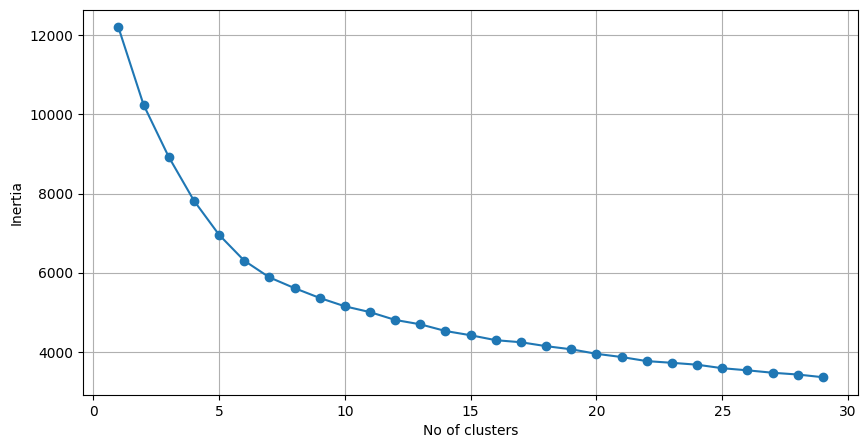

In [13]:
optimise_k_means(X,30)

In [14]:
clr = KMeans(n_clusters = 10,init = 'k-means++',random_state = 6)


In [15]:
clr.fit(X)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=6)

In [16]:
clr.cluster_centers_

array([[ 0.11386604, -0.04142892,  0.02371754,  0.71024226,  1.31791591,
         0.37658806, -0.31075927, -0.43231672, -0.78598262],
       [-0.81485306, -0.25260129, -0.08773596, -0.45650715, -0.43359399,
        -0.02728807,  0.42715029, -0.42005342, -0.47898002],
       [ 0.56745537, -0.2076476 ,  0.23172856,  0.01317533,  0.40314329,
         0.6534678 , -0.87212433,  2.62045278, -0.39379341],
       [-0.90770572, -0.25405516, -0.49741192, -0.06450522, -0.15236151,
        -1.64554023,  1.46394398, -0.21998131,  1.63896299],
       [ 1.12493155, -0.10641241, -0.03714234, -0.56668396, -0.52266051,
         1.05704333, -1.00572639,  0.06456907, -0.30136405],
       [-0.2907792 , -0.27465684, -0.26678635,  1.61006117,  0.49501318,
        -0.47524167,  0.4342497 ,  0.23580765,  0.31954489],
       [ 0.77801167,  2.11020606,  0.01143861, -0.63545778, -0.49019342,
         0.76194505, -0.19877546,  0.2379835 ,  1.12049195],
       [ 1.38481276, -0.38704376,  6.29985014, -0.06994585,  0

In [17]:
X = PCA(2).fit_transform(X)

In [18]:
X[0:5]

array([[-1.16300058,  0.27875868],
       [ 0.26208995,  1.19635823],
       [-0.1166589 ,  0.38183375],
       [ 1.31003813, -0.1118283 ],
       [-1.12563526,  0.49600493]])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


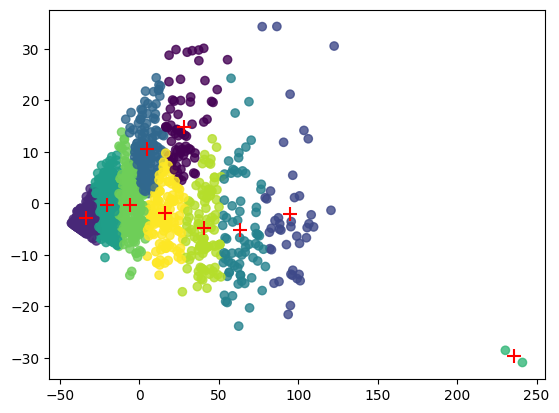

In [19]:
df = PCA(2).fit_transform(df)
clr = KMeans(n_clusters = 10,init = 'k-means++',random_state = 6) 
clr.fit(df) 
labels = clr.predict(df) 
centroid_labels = clr.predict(clr.cluster_centers_)
predicted_df = pd.DataFrame(data = df,columns = ['PCA1','PCA2'])
predicted_df['Cluster'] = labels
centroid_df = pd.DataFrame(data = clr.cluster_centers_,columns = ['PCA1','PCA2'])
centroid_df['Cluster'] = centroid_labels
plt.scatter(predicted_df['PCA1'],predicted_df['PCA2'],c = labels,alpha = 0.8)
plt.scatter(centroid_df['PCA1'],centroid_df['PCA2'],marker = '+',s = 100,c = 'red') 
plt.show()
